In [1]:
# data manipulation
import numpy as np
import cv2

#keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Convolution2D, MaxPooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [4]:
# training and testing dir
train_dir = 'data/train/'
test_dir = 'data/test/'
IMG_SIZE = 64

In [5]:
# PREPROCESSING DATA 

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(IMG_SIZE, IMG_SIZE),
                                                 batch_size=5,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(IMG_SIZE, IMG_SIZE),
                                            batch_size=5,
                                            class_mode='categorical') 

Found 2463 images belonging to 6 classes.
Found 551 images belonging to 6 classes.


In [12]:
# Initializing the CNN
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.1))

# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=6, activation='softmax')) # softmax for more than 2

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               802944    
__________

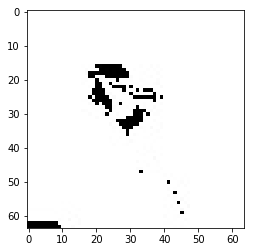

In [13]:
img = cv2.imread(train_dir + "0/0.jpg")
plt.imshow(img)
plt.show()

In [21]:
"""
from keras.utils.vis_utils import plot_model

plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
""" 

"\nfrom keras.utils.vis_utils import plot_model\n\nplot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)\n"

In [14]:
# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2

In [15]:
history = classifier.fit_generator(
        training_set,
        steps_per_epoch=600, # No of images in training set
        epochs=5,
        validation_data=test_set,
        validation_steps=30)# No of images in test set

Epoch 1/5
600/600 [==============================] - 127s 211ms/step - loss: 1.1901 - acc: 0.5379 - val_loss: 1.4016 - val_acc: 0.4800
Epoch 2/5
600/600 [==============================] - 44s 73ms/step - loss: 0.6218 - acc: 0.7771 - val_loss: 1.3610 - val_acc: 0.5333
Epoch 3/5
600/600 [==============================] - 40s 66ms/step - loss: 0.4190 - acc: 0.8558 - val_loss: 1.5969 - val_acc: 0.6600
Epoch 4/5
600/600 [==============================] - 39s 65ms/step - loss: 0.2843 - acc: 0.9063 - val_loss: 1.7652 - val_acc: 0.6027 loss: 0.
Epoch 5/5
600/600 [==============================] - 38s 63ms/step - loss: 0.2233 - acc: 0.9238 - val_loss: 1.6940 - val_acc: 0.6000


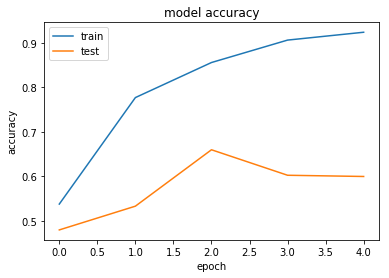

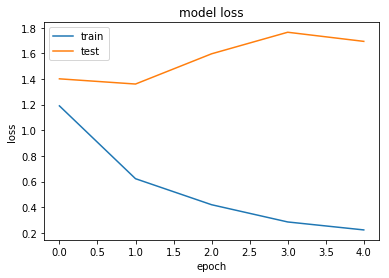

In [16]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
from os import listdir

def num2class(num):
    classes = ['ZOOM OUT', 'ZOOM IN', 'MOVE LEFT', 'MOVE RIGHT', 'MOVE UP', 'MOVE DOWN']
    return classes[int(num)]

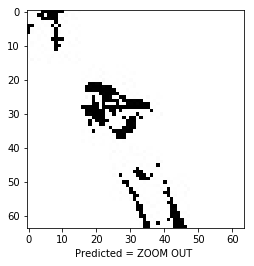

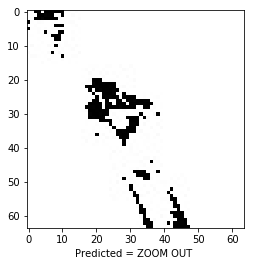

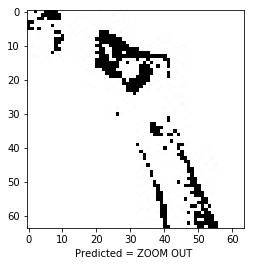

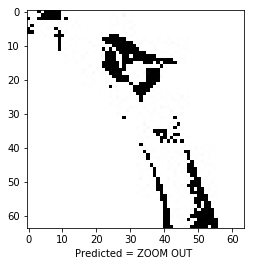

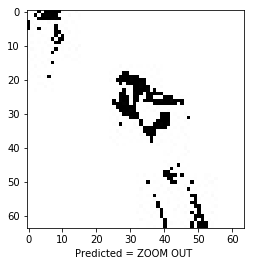

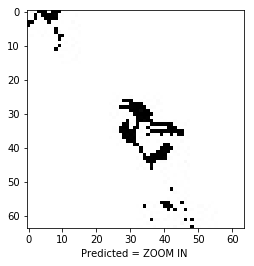

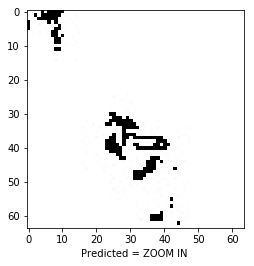

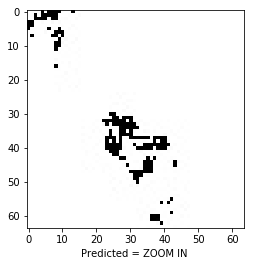

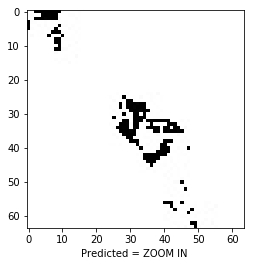

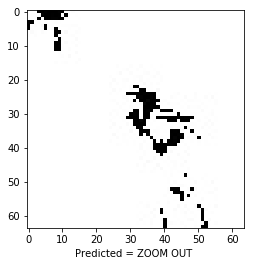

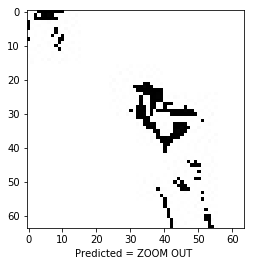

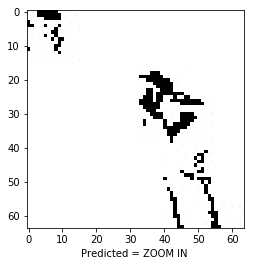

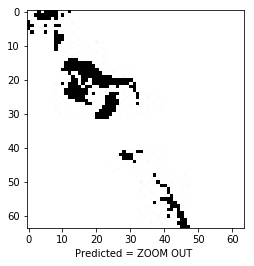

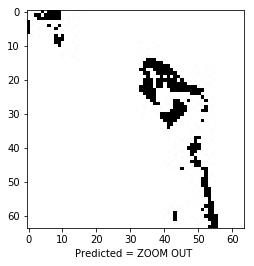

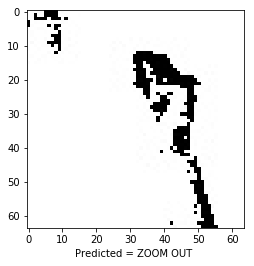

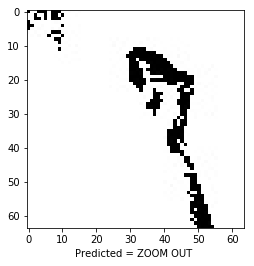

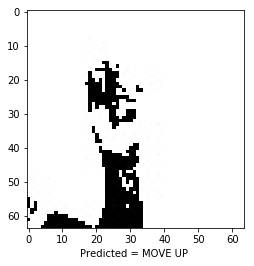

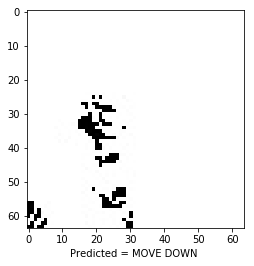

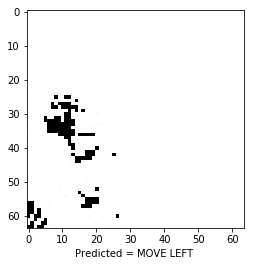

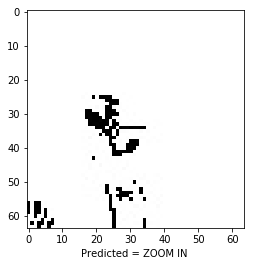

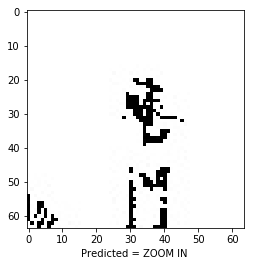

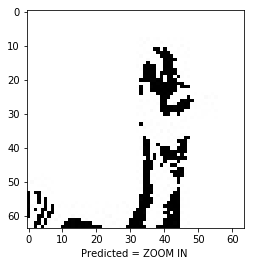

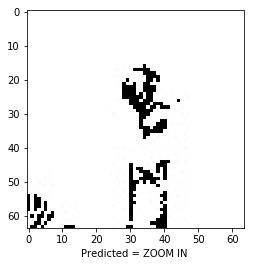

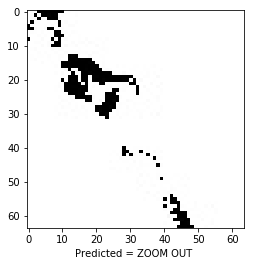

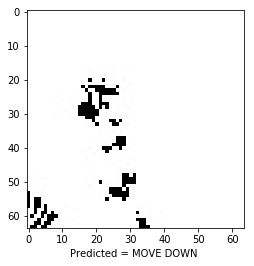

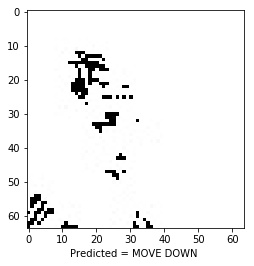

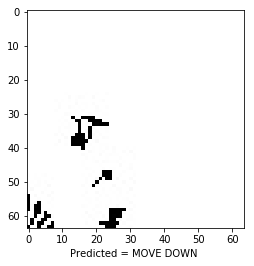

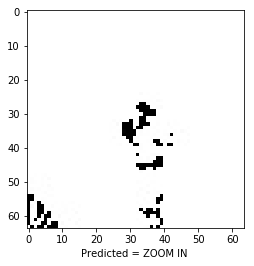

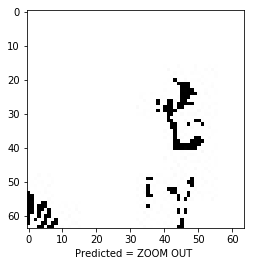

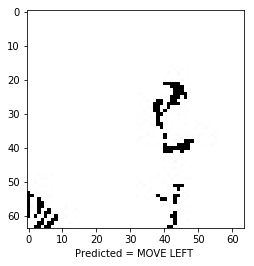

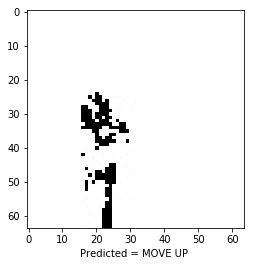

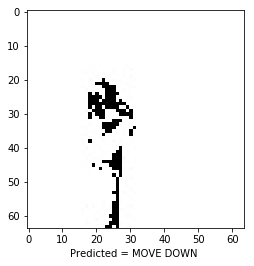

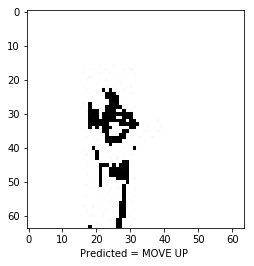

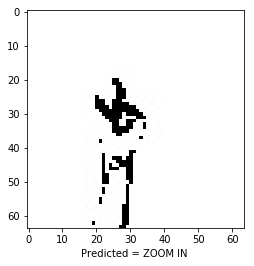

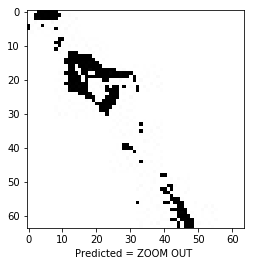

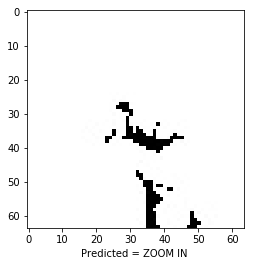

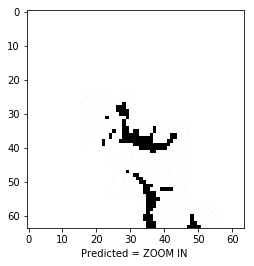

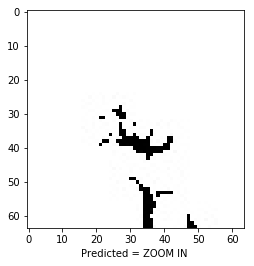

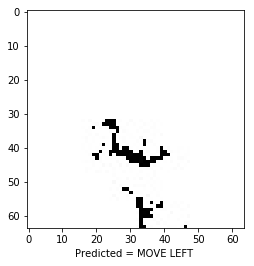

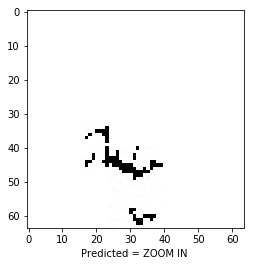

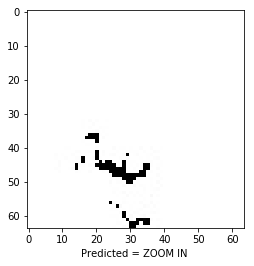

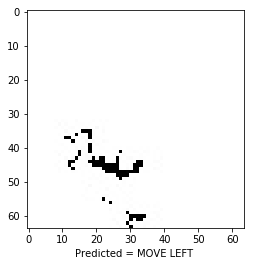

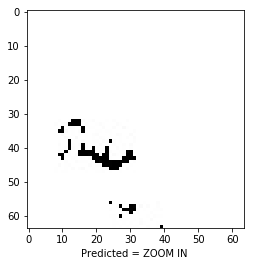

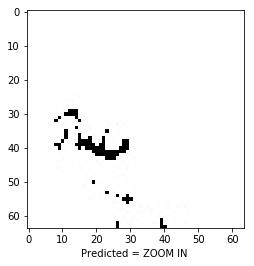

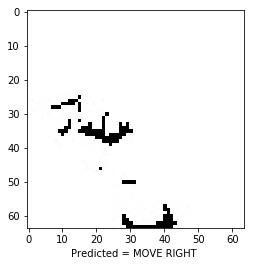

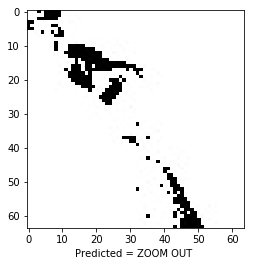

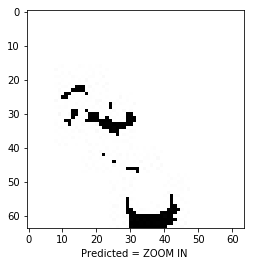

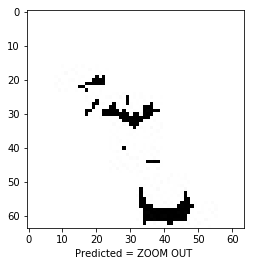

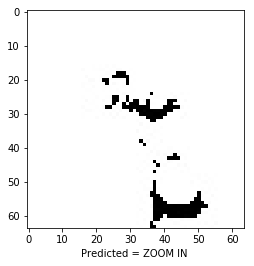

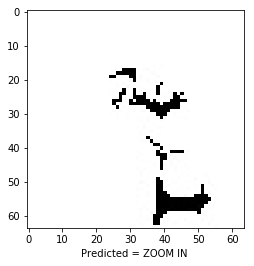

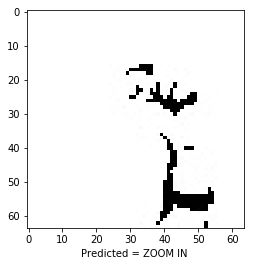

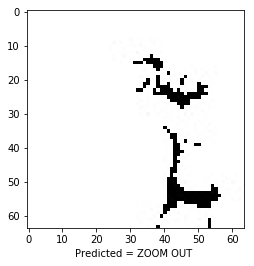

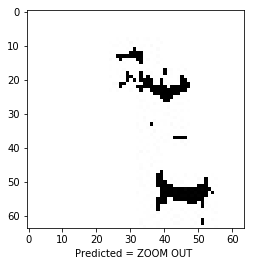

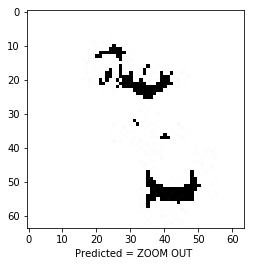

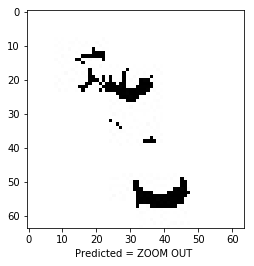

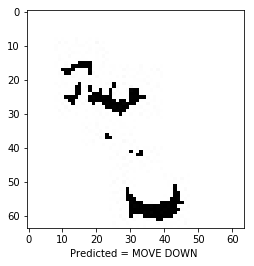

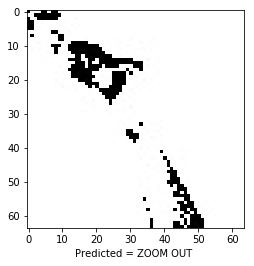

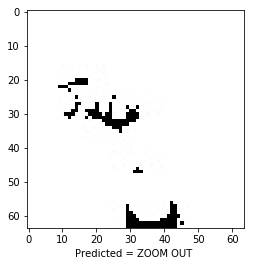

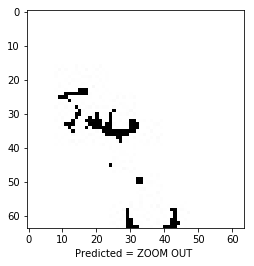

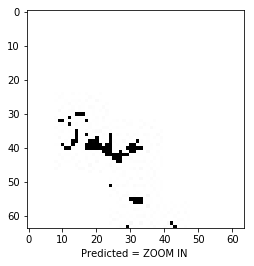

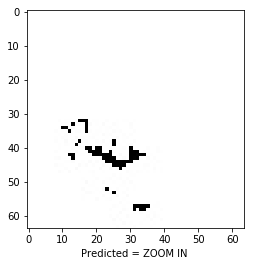

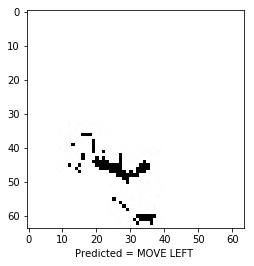

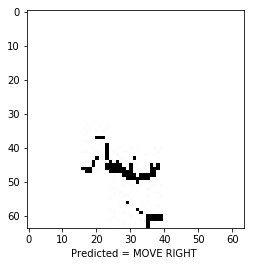

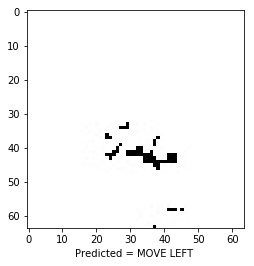

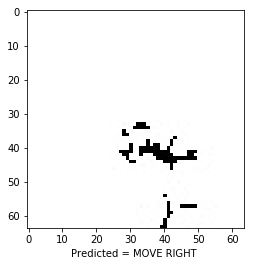

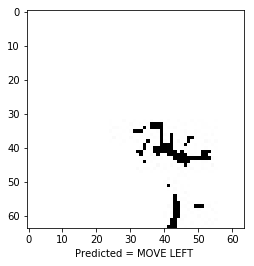

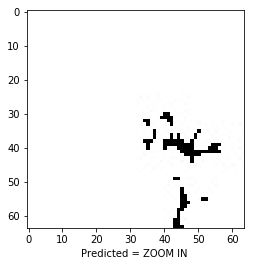

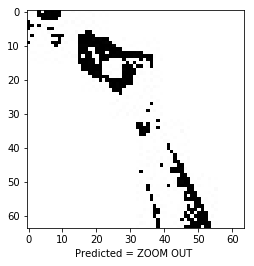

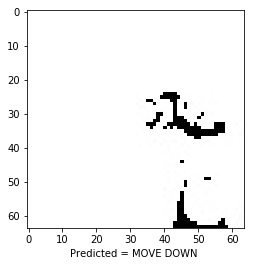

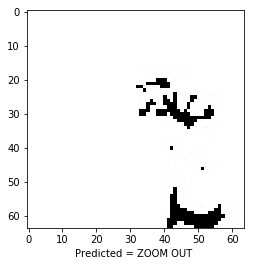

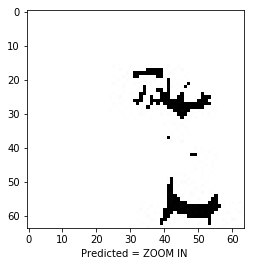

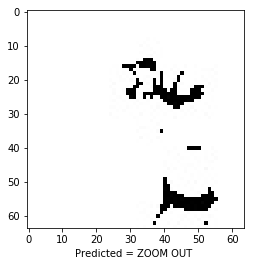

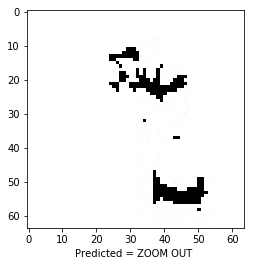

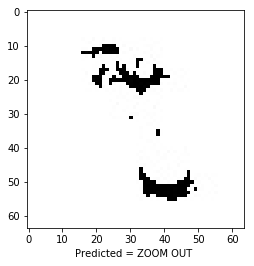

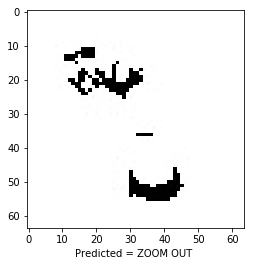

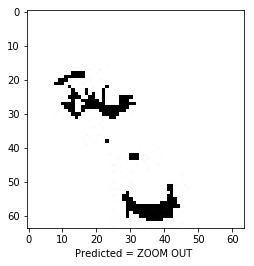

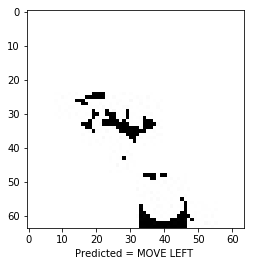

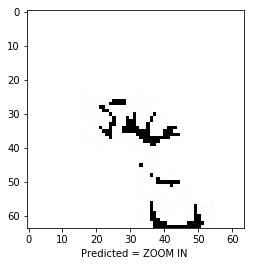

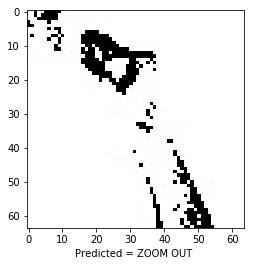

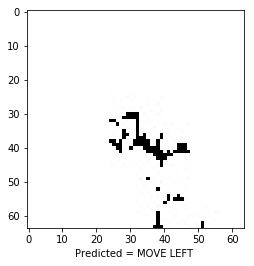

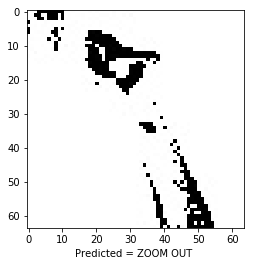

In [20]:
DIR = test_dir + "0/"
for img in listdir(DIR):
    img = cv2.imread(DIR + img)
    predict = classifier.predict(img.reshape(1, 64, 64, 3))
    pred_num = np.argmax(predict)
    plt.imshow(img)
    plt.xlabel("Predicted = {} ".format(num2class(pred_num)))
    plt.show()

In [19]:
# Saving the model
model_json = classifier.to_json()
with open("model-bw-6-class.json", "w") as json_file:
    json_file.write(model_json)
classifier.save_weights('model-bw-6-class.h5')